## Network Analysis of Twitter User on the 2019 Hong Kong Protest Movement (2)

In [1]:
# Generic ones
import numpy as np
import pandas as pd
import os

# Word processing libraries
import re
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# import necessary packages for network analysis
import networkx as nx
import matplotlib.pyplot as plt

/var/folders/x9/qwbg7g8502374fz76n_3_x1m0000gn/T/ipykernel_52083/695862002.py:16: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd

# Read the CSV data file
df = pd.read_csv('/Users/shiruizhou/Desktop/network analysis/hk_protest_network/transformed_df.csv')

# Display the first few rows of the DataFrame
print(df.head())


/var/folders/x9/qwbg7g8502374fz76n_3_x1m0000gn/T/ipykernel_52083/2632808603.py:4: DtypeWarning: Columns (77,79,80,81,84,86,87,88,91,93,94,95,98,100,101,102,105,107,108,109,112,114,115,116,119,121,122,123,126,128,129,130,133,135,136,137,140,142,143,144,147,149,150,151,154,156,157,158,161,163,164,165,168,170,171,172,175,177,178,179,182,184,185,186,189,191,192,193,196,198,199,200,203,205,206,207,210,212,213,214,217,219,220,221,224,226,227,228,231,233,234,235,238,240,241,242,245,247,248,249,252,254,255,256,259,261,262,263,266,268,269,270,273,275,276,277,280,282,283,284,287,289,290,291,294,296,297,298,301,303,304,305,308,310,311,312,315,317,318,319,322,324,325,326,329,331,332,333,336,338,339,340,343,345,346,347,350,352,353,354,357,359,360,361,364,366,367,368,371,373,374,375,378,380,381,382,385,387,388,389,392,394,395,396,399,401,402,403,406,408,409,410,413,415,416,417,420,422,423,424,427,429,430,431,434,436,437,438,441,443,444,445,448,450,451,452,455,457,458,459,462,464,465,466,469,471,472,

         username  following  followers  totaltweets        usercreatedts  \
0    five5demands      437.0      260.0        466.0  2019-10-05 13:40:37   
1  Dejavu53328974      581.0      360.0       7835.0  2019-08-27 15:47:34   
2        tsksimon      825.0      456.0       6728.0  2014-10-05 15:57:07   
3    eddieowen099      154.0       66.0        545.0  2017-05-09 01:04:24   
4   Jason07446286      440.0      326.0        527.0  2019-08-15 04:07:42   

             location                                           acctdesc  \
0                 n.a  hker fight for freedom 當獨裁成為事實 革命就是義務 #followb...   
1           hong kong  #followbackhongkong\n#standwithhk\n#hkhumanrig...   
2                 n.a                #fightforfreedom #standwithhongkong   
3  liverpool, england  currently in hk.\n🇬🇧🇭🇰🇨🇭🇩🇪🇸🇬\na liverpool fc @...   
4                  香港  if we burn, you burn with us. fight for freedo...   

      tweetcreatedts_1  retweetcount_1                hashtags_1  ...  \
0  2019

In [3]:
df['compound_mode'] = df[[f'compound_{i}' for i in range(1, 333)]].mode(axis=1)[0]

# Replace NaN with 0
for i in range(1, 333):
    df[f'compound_{i}'] = df[f'compound_{i}'].replace(np.nan, 0)

# Calculate the mode and mean
df['compound_mean'] = df[[f'compound_{i}' for i in range(1, 333)]].mean(axis=1)


/var/folders/x9/qwbg7g8502374fz76n_3_x1m0000gn/T/ipykernel_52083/1945096350.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['compound_mean'] = df[[f'compound_{i}' for i in range(1, 333)]].mean(axis=1)


In [4]:
df

,username,following,followers,totaltweets,usercreatedts,location,acctdesc,tweetcreatedts_1,retweetcount_1,hashtags_1,...,sentiment_class_331,tweetcreatedts_332,retweetcount_332,hashtags_332,mentioned_users_332,cleaned_text_332,compound_332,sentiment_class_332,compound_mode,compound_mean
0,five5demands,437.0,260.0,466.0,2019-10-05 13:40:37,n.a,hker fight for freedom 當獨裁成為事實 革命就是義務 #followb...,2019-11-03 02:57:49,292.0,['hongkong'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0000,0.003066
1,Dejavu53328974,581.0,360.0,7835.0,2019-08-27 15:47:34,hong kong,#followbackhongkong\n#standwithhk\n#hkhumanrig...,2019-11-03 02:57:49,1315.0,"['china', 'policestate']",...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0000,-0.003423
2,tsksimon,825.0,456.0,6728.0,2014-10-05 15:57:07,n.a,#fightforfreedom #standwithhongkong,2019-11-03 02:57:49,105.0,['hkpolicebrutality'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.8074,-0.004821
3,eddieowen099,154.0,66.0,545.0,2017-05-09 01:04:24,"liverpool, england",currently in hk.\n🇬🇧🇭🇰🇨🇭🇩🇪🇸🇬\na liverpool fc @...,2019-11-03 02:57:45,1821.0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.4767,-0.006050
4,Jason07446286,440.0,326.0,527.0,2019-08-15 04:07:42,香港,"if we burn, you burn with us. fight for freedo...",2019-11-03 02:57:44,66.0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.4939,-0.004159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23789,virgilioamendoz,1727.0,1732.0,8331.0,2014-02-01 02:08:13,n.a,#noobamabrosrefugees. #truthnottroll. #truthhu...,2019-11-19 17:19:45,1346.0,['hongkong'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.6597,-0.001987
23790,RobertsBlog,97.0,986.0,44852.0,2009-05-31 18:51:32,"lingen (ems), deutschland","was mich so interessiert, im nordwesten und an...",2019-11-19 17:19:41,452.0,['live'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.3400,0.001024
23791,arnauberenguer1,915.0,1022.0,42965.0,2017-09-14 16:40:44,bcn república de catalunya,catalancitizen #catalancouncil via fora!!!! ll...,2019-11-19 17:19:41,1368.0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.3612,-0.001088
23792,brunomnzs,555.0,1207.0,17185.0,2009-06-12 21:06:27,rio de janeiro 🇧🇷,musician and journalist. meditation and freedo...,2019-11-19 17:19:39,1346.0,['hongkong'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.6597,-0.001987


In [41]:
df

,username,following,followers,totaltweets,usercreatedts,location,acctdesc,tweetcreatedts_1,retweetcount_1,hashtags_1,...,sentiment_class_331,tweetcreatedts_332,retweetcount_332,hashtags_332,mentioned_users_332,cleaned_text_332,compound_332,sentiment_class_332,compound_mode,compound_mean
0,five5demands,437.0,260.0,466.0,2019-10-05 13:40:37,n.a,hker fight for freedom 當獨裁成為事實 革命就是義務 #followb...,2019-11-03 02:57:49,292.0,['hongkong'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0000,0.003066
1,Dejavu53328974,581.0,360.0,7835.0,2019-08-27 15:47:34,hong kong,#followbackhongkong\n#standwithhk\n#hkhumanrig...,2019-11-03 02:57:49,1315.0,"['china', 'policestate']",...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0000,-0.003423
2,tsksimon,825.0,456.0,6728.0,2014-10-05 15:57:07,n.a,#fightforfreedom #standwithhongkong,2019-11-03 02:57:49,105.0,['hkpolicebrutality'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.8074,-0.004821
3,eddieowen099,154.0,66.0,545.0,2017-05-09 01:04:24,"liverpool, england",currently in hk.\n🇬🇧🇭🇰🇨🇭🇩🇪🇸🇬\na liverpool fc @...,2019-11-03 02:57:45,1821.0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.4767,-0.006050
4,Jason07446286,440.0,326.0,527.0,2019-08-15 04:07:42,香港,"if we burn, you burn with us. fight for freedo...",2019-11-03 02:57:44,66.0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.4939,-0.004159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23789,virgilioamendoz,1727.0,1732.0,8331.0,2014-02-01 02:08:13,n.a,#noobamabrosrefugees. #truthnottroll. #truthhu...,2019-11-19 17:19:45,1346.0,['hongkong'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.6597,-0.001987
23790,RobertsBlog,97.0,986.0,44852.0,2009-05-31 18:51:32,"lingen (ems), deutschland","was mich so interessiert, im nordwesten und an...",2019-11-19 17:19:41,452.0,['live'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.3400,0.001024
23791,arnauberenguer1,915.0,1022.0,42965.0,2017-09-14 16:40:44,bcn república de catalunya,catalancitizen #catalancouncil via fora!!!! ll...,2019-11-19 17:19:41,1368.0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.3612,-0.001088
23792,brunomnzs,555.0,1207.0,17185.0,2009-06-12 21:06:27,rio de janeiro 🇧🇷,musician and journalist. meditation and freedo...,2019-11-19 17:19:39,1346.0,['hongkong'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.6597,-0.001987


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your original dataframe

# Get the column names you want
cols = ['cleaned_text_{}'.format(i) for i in range(1, 333)]

# Create sub dataframe
sub_df = df[cols].copy()

# Apply a lambda function to set non-NaN values to 1 and NaN values to 0
sub_df = sub_df.applymap(lambda x: 0 if pd.isna(x) else 1)



In [27]:
sub_df

,cleaned_text_1,cleaned_text_2,cleaned_text_3,cleaned_text_4,cleaned_text_5,cleaned_text_6,cleaned_text_7,cleaned_text_8,cleaned_text_9,cleaned_text_10,...,cleaned_text_323,cleaned_text_324,cleaned_text_325,cleaned_text_326,cleaned_text_327,cleaned_text_328,cleaned_text_329,cleaned_text_330,cleaned_text_331,cleaned_text_332
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23789,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23790,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23791,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23792,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


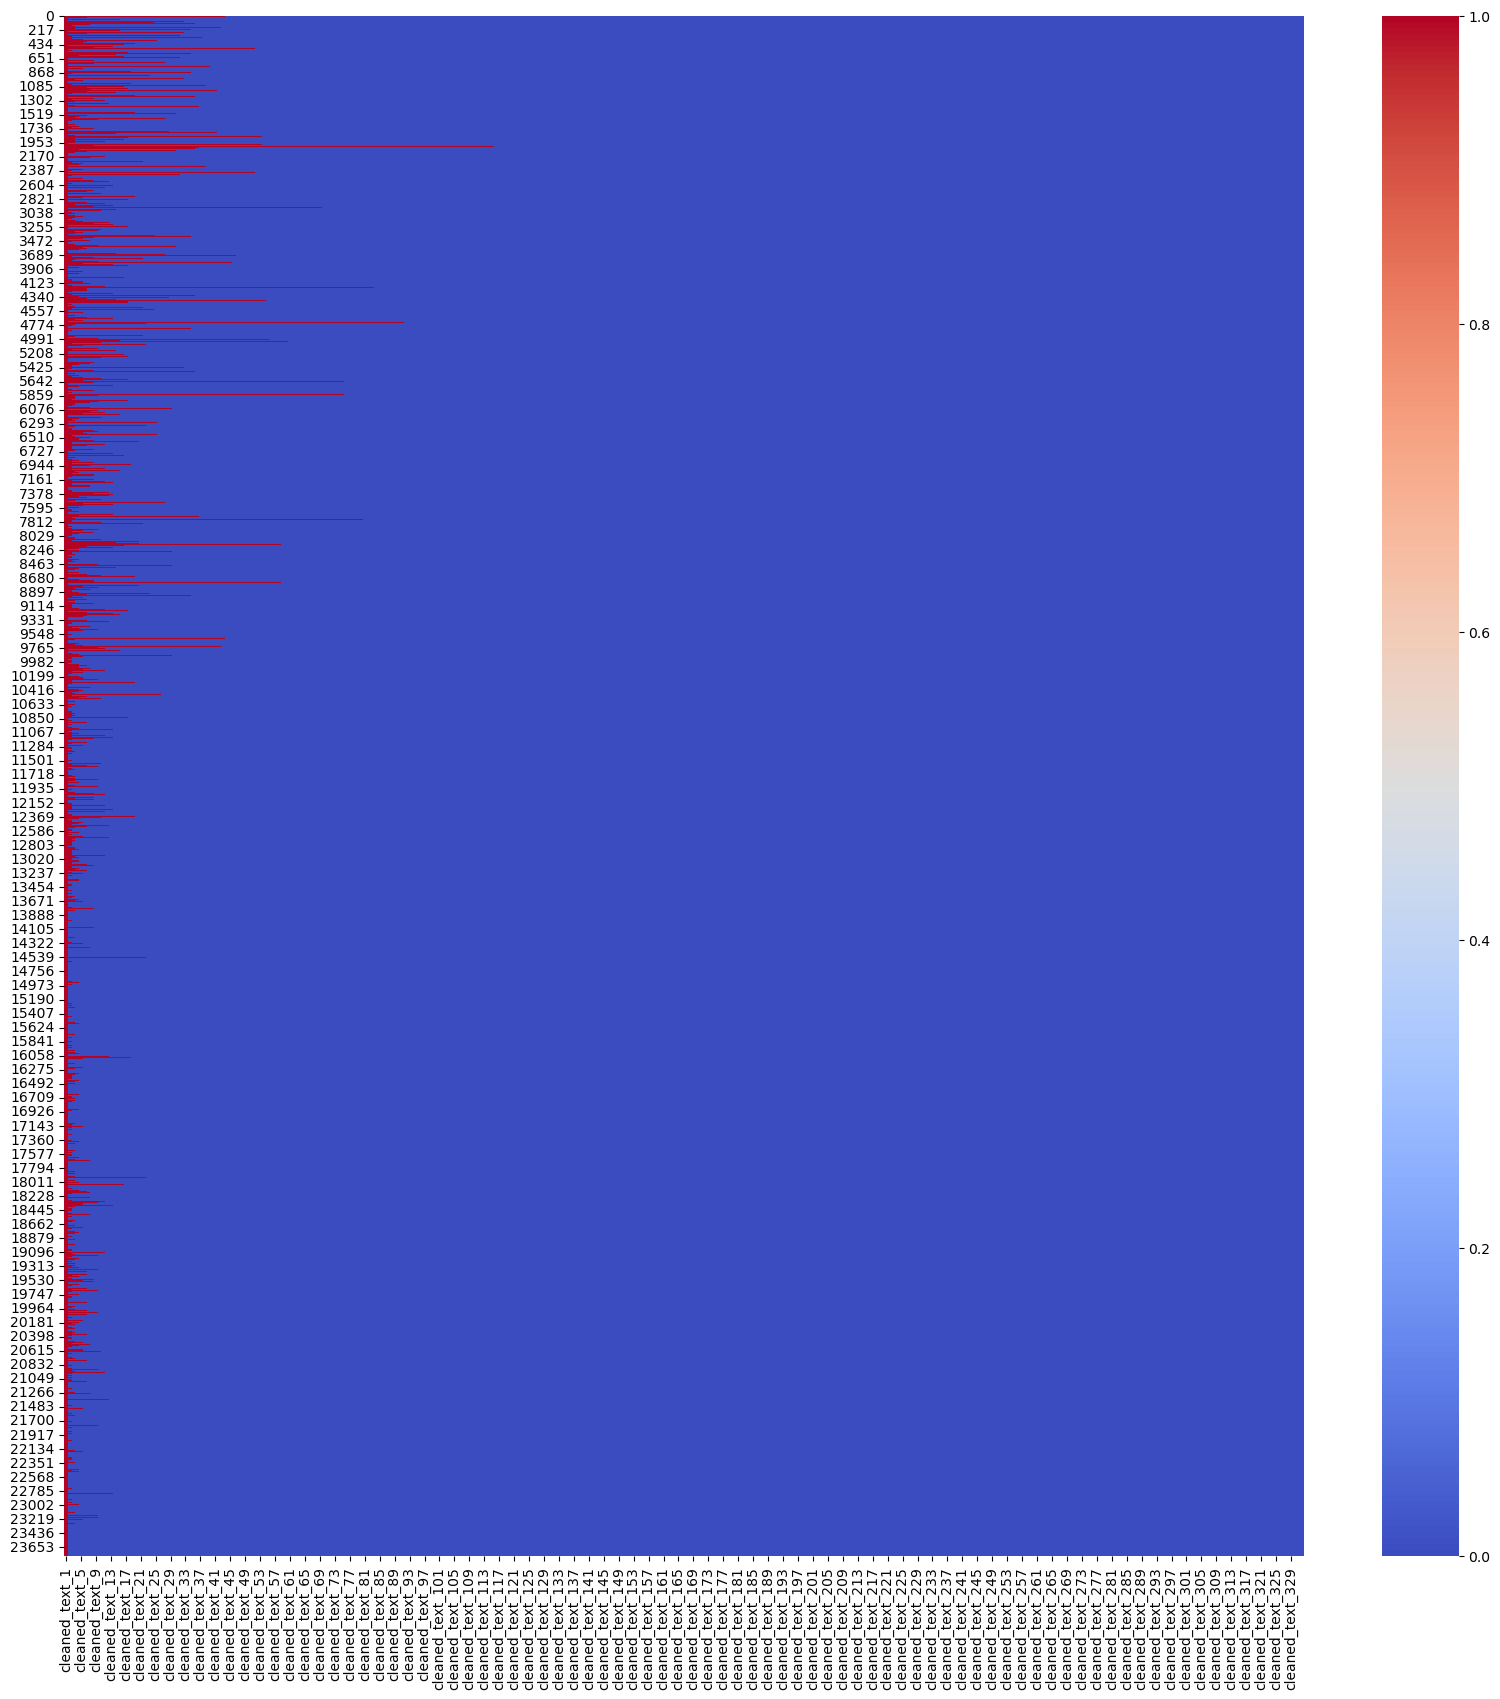

In [25]:
plt.figure(figsize=(20, 20))  # Adjust size as needed
sns.heatmap(sub_df, cmap='coolwarm', cbar=True)

plt.show()

In [5]:
# Set option to display all columns of the dataframe
pd.set_option('display.max_columns', None)

# Display the DataFrame
df

In [26]:
df[df['username'] == 'SolomonYue']

,username,following,followers,totaltweets,usercreatedts,location,acctdesc,tweetcreatedts_1,retweetcount_1,hashtags_1,...,sentiment_class_331,tweetcreatedts_332,retweetcount_332,hashtags_332,mentioned_users_332,cleaned_text_332,compound_332,sentiment_class_332,compound_mode,compound_mean
11304,SolomonYue,240.0,87014.0,10967.0,2013-04-09 15:38:48,"salem, oregon, usa","vice chairman & ceo at republicans overseas, r...",2019-11-09 02:26:03,581.0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,-0.008173


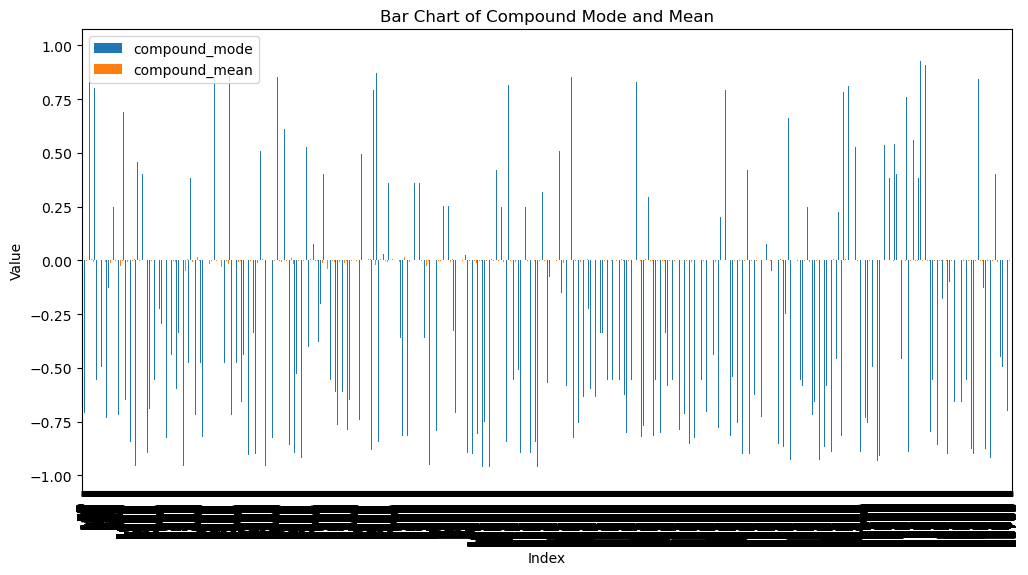

In [32]:
import matplotlib.pyplot as plt

# Make a bar chart
df[['compound_mode', 'compound_mean']].plot(kind='bar', figsize=(12, 6))

plt.title('Bar Chart of Compound Mode and Mean')
plt.xlabel('Index')
plt.ylabel('Value')

plt.show()


### Complete_network

In [26]:
import pandas as pd
import networkx as nx



# create a directed graph
G = nx.DiGraph()

# iterate over the DataFrame rows
for index, row in df.iterrows():
    # create nodes and add attributes
    user_name = row['username']
    if user_name not in G:
        G.add_node(user_name, following=row['following'], followers=row['followers'], location=row['location'], compound_mode=row['compound_mode'], compound_mean=row['compound_mean'])

    # add edges
    for i in range(1, 333): # assuming i ranges from 1 to 332
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = mentioned_users.split() # assuming users are separated by spaces
            for mentioned_user in mentioned_users:
                if mentioned_user not in G:
                    # add node if it doesn't exist, you can set the attributes to some default values or fetch them if possible
                    G.add_node(mentioned_user, following=0, followers=0, location='', compound_mode=0, compound_mean=0)
                
                if G.has_edge(user_name, mentioned_user):
                    # we added this link before, just increase the weight by one
                    G[user_name][mentioned_user]['weight'] += 1
                else:
                    # new link, create it with weight=1
                    G.add_edge(user_name, mentioned_user, weight=1)

# write the graph in GML format
nx.write_gml(G, 'network.gml')



In [6]:
import pandas as pd
import networkx as nx

# create a directed graph
G = nx.DiGraph()

# iterate over the DataFrame rows
for index, row in df.iterrows():
    # create nodes and add attributes
    user_name = row['username']
    if user_name not in G:
        G.add_node(user_name, following=row['following'], followers=row['followers'], location=row['location'], compound_mode=row['compound_mode'], compound_mean=row['compound_mean'])

    # add edges
    for i in range(1, 333): # assuming i ranges from 1 to 332
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = mentioned_users.split() # assuming users are separated by spaces
            for mentioned_user in mentioned_users:
                if mentioned_user not in G:
                    # add node if it doesn't exist, you can set the attributes to some default values or fetch them if possible
                    G.add_node(mentioned_user, following=0, followers=0, location='', compound_mode=0, compound_mean=0)
                
                if G.has_edge(user_name, mentioned_user):
                    # we added this one before, just increase the weight by one
                    G[user_name][mentioned_user]['weight'] += 1
                else:
                    # new edge, create it with weight=1
                    G.add_edge(user_name, mentioned_user, weight=1)

# add attributes to the nodes in the graph for GraphML
for node in G.nodes(data=True):
    node[1]['label'] = node[0]

# write the graph in GML format
nx.write_gml(G, 'network.gml')


In [15]:
import pandas as pd
import networkx as nx
import re

# create a directed graph
G = nx.DiGraph()

# pattern to match usernames
pattern = re.compile(r"@(\w+)")

# create a set of all usernames for quick lookup
all_usernames = set(df['username'])

# iterate over the DataFrame rows
for index, row in df.iterrows():
    # create nodes and add attributes
    user_name = row['username']
    if user_name not in G:
        G.add_node(user_name, following=row['following'], followers=row['followers'], location=row['location'], compound_mode=row['compound_mode'], compound_mean=row['compound_mean'])

    # add edges
    for i in range(1, 333): # assuming i ranges from 1 to 332
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = re.findall(pattern, mentioned_users)
            for mentioned_user in mentioned_users:
                if mentioned_user in all_usernames and mentioned_user not in G:
                    # add node if it doesn't exist and is a valid username, you can set the attributes to some default values or fetch them if possible
                    G.add_node(mentioned_user, following=0, followers=0, location='', compound_mode=0, compound_mean=0)
                if mentioned_user in G and user_name in G:
                    if G.has_edge(user_name, mentioned_user):
                        # we added this one before, just increase the weight by one
                        G[user_name][mentioned_user]['weight'] += 1
                    else:
                        # new edge, create it with weight=1
                        G.add_edge(user_name, mentioned_user, weight=1)

# add attributes to the nodes in the graph for GraphML
for node in G.nodes(data=True):
    node[1]['label'] = node[0]

# write the graph in GML format
nx.write_gml(G, 'network_0.gml')


In [30]:
import pandas as pd
import networkx as nx
import re

# Assuming you have the DataFrame 'df' containing the necessary data.
# Replace this part with your actual data loading procedure.
# df = pd.read_csv('your_data.csv')

# create a directed graph
G = nx.DiGraph()

# pattern to match usernames
pattern = re.compile(r"@(\w+)")

# create a set of all usernames for quick lookup
all_usernames = set(df['username'])

# iterate over the DataFrame rows
for index, row in df.iterrows():
    # create nodes and add attributes
    user_name = row['username']
    if user_name not in G:
        G.add_node(user_name, following=row['following'], followers=row['followers'], location=row['location'], compound_mode=row['compound_mode'], compound_mean=row['compound_mean'])

    # Add hashtags and tweetcreatedts attributes
    for i in range(1, 333):  # assuming i ranges from 1 to 332
        hashtags_i = row[f'hashtags_{i}']
        tweetcreatedts_i = row[f'tweetcreatedts_{i}']

        # Check if 'hashtags_i' is not NaN (not missing)
        if pd.notna(hashtags_i):
            G.nodes[user_name]['hashtags_' + str(i)] = hashtags_i

        # Check if 'tweetcreatedts_i' is not NaN (not missing)
        if pd.notna(tweetcreatedts_i):
            G.nodes[user_name]['tweetcreatedts_' + str(i)] = tweetcreatedts_i

        # Add edges
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = re.findall(pattern, mentioned_users)
            for mentioned_user in mentioned_users:
                if mentioned_user in all_usernames and mentioned_user not in G:
                    # add node if it doesn't exist and is a valid username,
                    # you can set the attributes to some default values or fetch them if possible
                    G.add_node(mentioned_user, following=0, followers=0, location='', compound_mode=0, compound_mean=0)
                if mentioned_user in G and user_name in G:
                    if G.has_edge(user_name, mentioned_user):
                        # we added this one before, just increase the weight by one
                        G[user_name][mentioned_user]['weight'] += 1
                    else:
                        # new edge, create it with weight=1
                        G.add_edge(user_name, mentioned_user, weight=1)

# Add attributes to the nodes in the graph for GraphML
for node in G.nodes(data=True):
    node[1]['label'] = node[0]

# write the graph in GML format
nx.write_gml(G, 'network_0_1.gml')

In [44]:
import pandas as pd
import networkx as nx
import re
from datetime import datetime

# Define the boundaries for time frames t1-t4
time_frames = {
    't1': ('2019-11-03', '2019-11-06'),
    't2': ('2019-11-07', '2019-11-10'),
    't3': ('2019-11-11', '2019-11-14'),
    't4': ('2019-11-15', '2019-11-19')
}

# Function to assign time frame based on date
def assign_time_frame(date_str):
    date_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
    for frame, (start, end) in time_frames.items():
        if datetime.strptime(start, "%Y-%m-%d") <= date_obj <= datetime.strptime(end, "%Y-%m-%d"):
            return frame
    return None

# Other code remains the same...

# Inside the loop over DataFrame rows:
for index, row in df.iterrows():
    # create nodes and add attributes
    user_name = row['username']
    if user_name not in G:
        G.add_node(user_name, following=row['following'], followers=row['followers'], location=row['location'], compound_mode=row['compound_mode'], compound_mean=row['compound_mean'])

    # Inside loop over i:
    for i in range(1, 333):
        hashtags_i = row[f'hashtags_{i}']
        tweetcreatedts_i = row[f'tweetcreatedts_{i}']

        time_frame = assign_time_frame(tweetcreatedts_i) if pd.notna(tweetcreatedts_i) else None

        # Handle hashtags as single words
        if pd.notna(hashtags_i):
            hashtags_i = [hashtag.replace("'", "") for hashtag in re.findall(r"'(.*?)'", hashtags_i)]
            if time_frame:
                G.nodes[user_name][f'hashtags_{time_frame}'] = ' '.join(hashtags_i)
            else:
                G.nodes[user_name][f'hashtags_{i}'] = ' '.join(hashtags_i)

        # Handle tweetcreatedts by time frame
        if time_frame and pd.notna(tweetcreatedts_i):
            G.nodes[user_name][f'tweetcreatedts_{time_frame}'] = tweetcreatedts_i
        elif pd.notna(tweetcreatedts_i):
            G.nodes[user_name][f'tweetcreatedts_{i}'] = tweetcreatedts_i
        
        #Add edges
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = re.findall(pattern, mentioned_users)
            for mentioned_user in mentioned_users:
                if mentioned_user in all_usernames and mentioned_user not in G:
                    # add node if it doesn't exist and is a valid username,
                    # you can set the attributes to some default values or fetch them if possible
                    G.add_node(mentioned_user, following=0, followers=0, location='', compound_mode=0, compound_mean=0)
                if mentioned_user in G and user_name in G:
                    if G.has_edge(user_name, mentioned_user):
                        # we added this one before, just increase the weight by one
                        G[user_name][mentioned_user]['weight'] += 1
                    else:
                        # new edge, create it with weight=1
                        G.add_edge(user_name, mentioned_user, weight=1)

# Add attributes to the nodes in the graph for GraphML
for node in G.nodes(data=True):
    node[1]['label'] = node[0]

# write the graph in GML format
nx.write_gml(G, 'network_0_1_2.gml')

In [68]:
import pandas as pd
import networkx as nx
import re
from datetime import datetime

# Define the boundaries for time frames t1-t4
time_frames = {
    't1': ('2019-11-03', '2019-11-06'),
    't2': ('2019-11-07', '2019-11-10'),
    't3': ('2019-11-11', '2019-11-14'),
    't4': ('2019-11-15', '2019-11-19')
}

# Create separate graphs for each time frame
graphs = {f't{i}': nx.DiGraph() for i in range(1, 5)}

# Function to assign time frame based on date
def assign_time_frame(date_str):
    date_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
    for frame, (start, end) in time_frames.items():
        if datetime.strptime(start, "%Y-%m-%d") <= date_obj <= datetime.strptime(end, "%Y-%m-%d"):
            return frame
    return None

# Read your data
all_usernames = df['username'].unique()

# Loop over DataFrame rows
for index, row in df.iterrows():
    user_name = row['username']

    # Loop over i
    for i in range(1, 333):
        hashtags_i = row[f'hashtags_{i}']
        tweetcreatedts_i = row[f'tweetcreatedts_{i}']
        time_frame = assign_time_frame(tweetcreatedts_i) if pd.notna(tweetcreatedts_i) else None

        # If not within the defined time frames, skip to next iteration
        if time_frame is None:
            continue

        graph = graphs[time_frame]

        # Create nodes if they don't exist
        if user_name not in graph:
            graph.add_node(user_name, following=row['following'], followers=row['followers'], location=row['location'], compound_mode=row['compound_mode'], compound_mean=row['compound_mean'])

        if pd.notna(hashtags_i):
            hashtags_i = ' '.join([hashtag.replace("'", "") for hashtag in re.findall(r"'(.*?)'", hashtags_i)])

        # Handle mentioned users and create edges with hashtag information
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = re.findall(r"@\w+", mentioned_users)
            for mentioned_user in mentioned_users:
                if mentioned_user in all_usernames:
                    if mentioned_user not in graph:
                        graph.add_node(mentioned_user, following=0, followers=0, location='', compound_mode=0, compound_mean=0)
                    if graph.has_edge(user_name, mentioned_user):
                        graph[user_name][mentioned_user]['weight'] += 1
                    else:
                        graph.add_edge(user_name, mentioned_user, weight=1, hashtags=hashtags_i)

# Write graphs in GML format
for frame, graph in graphs.items():
    nx.write_gml(graph, f'network_1_{frame}.gml')


In [53]:
df

,username,following,followers,totaltweets,usercreatedts,location,acctdesc,tweetcreatedts_1,retweetcount_1,hashtags_1,...,sentiment_class_331,tweetcreatedts_332,retweetcount_332,hashtags_332,mentioned_users_332,cleaned_text_332,compound_332,sentiment_class_332,compound_mode,compound_mean
0,five5demands,437.0,260.0,466.0,2019-10-05 13:40:37,n.a,hker fight for freedom 當獨裁成為事實 革命就是義務 #followb...,2019-11-03 02:57:49,292.0,['hongkong'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0000,0.003066
1,Dejavu53328974,581.0,360.0,7835.0,2019-08-27 15:47:34,hong kong,#followbackhongkong\n#standwithhk\n#hkhumanrig...,2019-11-03 02:57:49,1315.0,"['china', 'policestate']",...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0000,-0.003423
2,tsksimon,825.0,456.0,6728.0,2014-10-05 15:57:07,n.a,#fightforfreedom #standwithhongkong,2019-11-03 02:57:49,105.0,['hkpolicebrutality'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.8074,-0.004821
3,eddieowen099,154.0,66.0,545.0,2017-05-09 01:04:24,"liverpool, england",currently in hk.\n🇬🇧🇭🇰🇨🇭🇩🇪🇸🇬\na liverpool fc @...,2019-11-03 02:57:45,1821.0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.4767,-0.006050
4,Jason07446286,440.0,326.0,527.0,2019-08-15 04:07:42,香港,"if we burn, you burn with us. fight for freedo...",2019-11-03 02:57:44,66.0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.4939,-0.004159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23789,virgilioamendoz,1727.0,1732.0,8331.0,2014-02-01 02:08:13,n.a,#noobamabrosrefugees. #truthnottroll. #truthhu...,2019-11-19 17:19:45,1346.0,['hongkong'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.6597,-0.001987
23790,RobertsBlog,97.0,986.0,44852.0,2009-05-31 18:51:32,"lingen (ems), deutschland","was mich so interessiert, im nordwesten und an...",2019-11-19 17:19:41,452.0,['live'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.3400,0.001024
23791,arnauberenguer1,915.0,1022.0,42965.0,2017-09-14 16:40:44,bcn república de catalunya,catalancitizen #catalancouncil via fora!!!! ll...,2019-11-19 17:19:41,1368.0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.3612,-0.001088
23792,brunomnzs,555.0,1207.0,17185.0,2009-06-12 21:06:27,rio de janeiro 🇧🇷,musician and journalist. meditation and freedo...,2019-11-19 17:19:39,1346.0,['hongkong'],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.6597,-0.001987


In [57]:

import pandas as pd
import networkx as nx
import re

def assign_time_frame(timestamp):
    timestamp = pd.to_datetime(timestamp)
    for frame, (start, end) in periods.items():
        if start <= timestamp <= end:
            return frame
    return None

# Define periods
periods = {
    't1': (pd.Timestamp('2019-11-03'), pd.Timestamp('2019-11-06')),
    't2': (pd.Timestamp('2019-11-07'), pd.Timestamp('2019-11-10')),
    't3': (pd.Timestamp('2019-11-11'), pd.Timestamp('2019-11-14')),
    't4': (pd.Timestamp('2019-11-15'), pd.Timestamp('2019-11-19')),
}

# Create dictionaries to hold separate directed graphs for each time frame
graphs = {f't{i}': nx.DiGraph() for i in range(1, 5)}


# Example pattern for extracting mentioned users; adjust as needed
pattern = r"@\w+"

# Inside the loop over DataFrame rows
for index, row in df.iterrows():
    user_name = row['username']

    # Inside loop over i
    for i in range(1, 333):
        hashtags_i = row[f'hashtags_{i}']
        tweetcreatedts_i = row[f'tweetcreatedts_{i}']
        time_frame = assign_time_frame(tweetcreatedts_i) if pd.notna(tweetcreatedts_i) else None

        # Skip iteration if time frame is None
        if time_frame is None:
            continue

        # Handle hashtags as node labels
        if pd.notna(hashtags_i):
            hashtags_i = ' '.join([hashtag.replace("'", "") for hashtag in re.findall(r"'(.*?)'", hashtags_i)])
            graphs[time_frame].add_node(user_name, label=hashtags_i, following=row['following'], followers=row['followers'], location=row['location'], compound_mode=row['compound_mode'], compound_mean=row['compound_mean'])

        # Add edges
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = re.findall(pattern, mentioned_users)
            for mentioned_user in mentioned_users:
                if mentioned_user not in graphs[time_frame]:
                    graphs[time_frame].add_node(mentioned_user, label='', following=0, followers=0, location='', compound_mode=0, compound_mean=0)
                if graphs[time_frame].has_edge(user_name, mentioned_user):
                    graphs[time_frame][user_name][mentioned_user]['weight'] += 1
                else:
                    graphs[time_frame].add_edge(user_name, mentioned_user, weight=1)

# Write graphs
for frame, graph in graphs.items():
    nx.write_gml(graph, f'network_{frame}.gml')


In [33]:
import pandas as pd
import networkx as nx
import re

# Assuming you have the DataFrame 'df' containing the necessary data.
# Replace this part with your actual data loading procedure.
# df = pd.read_csv('your_data.csv')

# create a directed graph
G = nx.DiGraph()

# pattern to match usernames
pattern = re.compile(r"@(\w+)")

# iterate over the DataFrame rows to add all user nodes
for index, row in df.iterrows():
    # create nodes and add attributes
    user_name = row['username']
    if user_name not in G:
        G.add_node(user_name, following=row['following'], followers=row['followers'], location=row['location'], compound_mode=row['compound_mode'], compound_mean=row['compound_mean'])

# Now iterate over the DataFrame again to add all edges (mentions)
for index, row in df.iterrows():
    user_name = row['username']

    # Add edges from 'user_name' to each mentioned user in each tweet
    for i in range(1, 333):  # assuming i ranges from 1 to 332
        mentioned_users = row[f'mentioned_users_{i}']

        if pd.notna(mentioned_users):
            mentioned_users = re.findall(pattern, mentioned_users)

            for mentioned_user in mentioned_users:
                if mentioned_user in G:  # only add an edge if 'mentioned_user' is a valid user in the graph
                    if G.has_edge(user_name, mentioned_user):
                        # we added this one before, just increase the weight by one
                        G[user_name][mentioned_user]['weight'] += 1
                    else:
                        # new edge, create it with weight=1
                        G.add_edge(user_name, mentioned_user, weight=1)

# Add attributes to the nodes in the graph for GraphML
for node in G.nodes(data=True):
    node[1]['label'] = node[0]

# write the graph in GML format
nx.write_gml(G, 'network_0_2.gml')


In [16]:
# Number of nodes in the network
num_nodes = len(G.nodes)

# Number of edges in the network
num_edges = len(G.edges)

# Create a set of all node names for quick lookup
network_nodes = set(G.nodes)

# Initialize counts
mentioned_users_in_network = 0
mentioned_users_not_in_network = 0

# Iterate over DataFrame rows
for index, row in df.iterrows():
    for i in range(1, 333):  # Assuming i ranges from 1 to 332
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = re.findall(pattern, mentioned_users)
            for mentioned_user in mentioned_users:
                if mentioned_user in network_nodes:
                    mentioned_users_in_network += 1
                else:
                    mentioned_users_not_in_network += 1

print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Number of mentioned users in network: {mentioned_users_in_network}')
print(f'Number of mentioned users not in network: {mentioned_users_not_in_network}')


Number of nodes: 23794
Number of edges: 15075
Number of mentioned users in network: 21222
Number of mentioned users not in network: 34833


In [17]:
# Number of nodes in the network
num_nodes = len(G.nodes)

# Number of edges in the network
num_edges = len(G.edges)

# Create a set of all node names for quick lookup
network_nodes = set(G.nodes)

# Initialize counts
mentioned_users_in_network = 0
mentioned_users_not_in_network = 0

# Iterate over DataFrame rows
for index, row in df.iterrows():
    mentioned_users_set = set()  # to remove duplicates
    for i in range(1, 333):  # Assuming i ranges from 1 to 332
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = re.findall(pattern, mentioned_users)
            mentioned_users_set.update(mentioned_users)  # add mentioned users to the set
    for mentioned_user in mentioned_users_set:
        if mentioned_user in network_nodes:
            mentioned_users_in_network += 1
        else:
            mentioned_users_not_in_network += 1

print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Number of mentioned users in network: {mentioned_users_in_network}')
print(f'Number of mentioned users not in network: {mentioned_users_not_in_network}')



Number of nodes: 23794
Number of edges: 15075
Number of mentioned users in network: 15075
Number of mentioned users not in network: 28198


In [34]:
# Number of nodes in the network
num_nodes = len(G.nodes)

# Number of edges in the network
num_edges = len(G.edges)

# Create a set of all node names for quick lookup
network_nodes = set(G.nodes)

# Initialize sets
mentioned_users_in_network = set()
mentioned_users_not_in_network = set()

# Iterate over DataFrame rows
for index, row in df.iterrows():
    for i in range(1, 333):  # Assuming i ranges from 1 to 332
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = re.findall(pattern, mentioned_users)
            for mentioned_user in mentioned_users:
                if mentioned_user in network_nodes:
                    mentioned_users_in_network.add(mentioned_user)
                else:
                    mentioned_users_not_in_network.add(mentioned_user)

print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Number of unique mentioned users in network: {len(mentioned_users_in_network)}')
print(f'Number of unique mentioned users not in network: {len(mentioned_users_not_in_network)}')


Number of nodes: 23794
Number of edges: 15075
Number of unique mentioned users in network: 107
Number of unique mentioned users not in network: 511


In [5]:
import pandas as pd
import networkx as nx
import re

# create a directed graph
G = nx.DiGraph()

# pattern to match usernames
pattern = re.compile(r"@(\w+)")

# iterate over the DataFrame rows
for index, row in df.iterrows():
    # create nodes and add attributes
    user_name = row['username']
    if user_name not in G:
        G.add_node(user_name, following=row['following'], followers=row['followers'], location=row['location'], compound_mode=row['compound_mode'], compound_mean=row['compound_mean'])

    # add edges
    for i in range(1, 333): # assuming i ranges from 1 to 332
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = re.findall(pattern, mentioned_users)
            for idx, mentioned_user in enumerate(mentioned_users, 1):
                mentioned_user_key = f"mentioned_user_{idx}"
                if mentioned_user_key not in G:
                    # add node if it doesn't exist, you can set the attributes to some default values or fetch them if possible
                    G.add_node(mentioned_user_key, following=0, followers=0, location='', compound_mode=0, compound_mean=0)

                if G.has_edge(user_name, mentioned_user_key):
                    # we added this one before, just increase the weight by one
                    G[user_name][mentioned_user_key]['weight'] += 1
                else:
                    # new edge, create it with weight=1
                    G.add_edge(user_name, mentioned_user_key, weight=1)

# add attributes to the nodes in the graph for GraphML
for node in G.nodes(data=True):
    node[1]['label'] = node[0]

# write the graph in GML format
nx.write_gml(G, 'network_1.gml')


In [6]:
import pandas as pd
import networkx as nx
import re

# create a directed graph
G = nx.DiGraph()

# pattern to match usernames
pattern = re.compile(r"@(\w+)")

# iterate over the DataFrame rows
for index, row in df.iterrows():
    # create nodes and add attributes
    user_name = row['username']
    if user_name not in G:
        G.add_node(user_name, following=row['following'], followers=row['followers'], location=row['location'], compound_mode=row['compound_mode'], compound_mean=row['compound_mean'])

    # add edges
    for i in range(1, 333): # assuming i ranges from 1 to 332
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = re.findall(pattern, mentioned_users)
            for idx, mentioned_user in enumerate(mentioned_users, 1):
                mentioned_user_key = f"mentioned_user_{idx}"
                if mentioned_user_key in G:
                    if G.has_edge(user_name, mentioned_user_key):
                        # we added this one before, just increase the weight by one
                        G[user_name][mentioned_user_key]['weight'] += 1
                    else:
                        # new edge, create it with weight=1
                        G.add_edge(user_name, mentioned_user_key, weight=1)

# add attributes to the nodes in the graph for GraphML
for node in G.nodes(data=True):
    node[1]['label'] = node[0]

# write the graph in GML format
nx.write_gml(G, 'network_2.gml')


In [8]:
import pandas as pd
import networkx as nx
import re

# create a directed graph
G = nx.DiGraph()

# pattern to match usernames
pattern = re.compile(r"@(\w+)")

# iterate over the DataFrame rows
for index, row in df.iterrows():
    # create nodes and add attributes
    user_name = row['username']
    if user_name not in G:
        G.add_node(user_name, following=row['following'], followers=row['followers'], location=row['location'], compound_mode=row['compound_mode'], compound_mean=row['compound_mean'])

    # add edges
    for i in range(1, 333): # assuming i ranges from 1 to 332
        mentioned_users = row[f'mentioned_users_{i}']
        if pd.notna(mentioned_users):
            mentioned_users = re.findall(pattern, mentioned_users)
            for idx, mentioned_user in enumerate(mentioned_users, 1):
                mentioned_user_key = f"mentioned_user_{idx}"
                if mentioned_user_key in G:
                    if G.add_edge(mentioned_user_key, user_name):
                        # we added this one before, just increase the weight by one
                        G[mentioned_user_key][user_name]['weight'] += 1
                    else:
                        # new edge, create it with weight=1
                        G.add_edge(mentioned_user_key, user_name, weight=1)

# add attributes to the nodes in the graph for GraphML
for node in G.nodes(data=True):
    node[1]['label'] = node[0]

# write the graph in GML format
nx.write_gml(G, 'network_3.gml')


In [10]:
for i in range(1, 333):
    mentioned_users = row[f'mentioned_users_{i}']
    if pd.notna(mentioned_users):
        mentioned_users = re.findall(pattern, mentioned_users)
mentioned_users

nan

In [ ]:
# # Visualize the network
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(G, k=0.15, seed=42)
# widths = [G[u][v]['weight'] for u, v in G.edges()]
# nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=widths, arrowsize=15, arrowstyle='->', alpha=0.8)
# plt.title('Network of Users and Mentioned Users')
# plt.axis('off')
# plt.show()

In [35]:
def plot_degree_distribution(G, type="", fit=False, path=""):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    
    # Check if the graph is directed
    if nx.is_directed(G):
        if type == "in":
            degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)
        elif type == "out":
            degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)
        
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots(2,2, figsize=(15,10))
    
    # Plot PDF
    ax[0, 0].bar(deg, cnt, width=0.80, color="b")
    ax[0, 0].set_title("Degree PDF")
    ax[0, 0].set_ylabel("Count")
    ax[0, 0].set_xlabel("Degree")
    
    # Fit PDF
    if fit:
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(deg),np.log(cnt))
        ax[0, 0].plot(deg, intercept + slope*np.log(deg), 'r', label=f'y={slope}x+{intercept}')
        ax[0, 0].legend()

    # Plot log-PDF
    ax[0, 1].bar(deg, cnt, width=0.80, color="b")
    ax[0, 1].set_title("Log-Degree PDF")
    ax[0, 1].set_ylabel("Count")
    ax[0, 1].set_xlabel("Degree")
    ax[0, 1].set_yscale('log')
    ax[0, 1].set_xscale('log')

    # Plot cCDF
    cdf = np.cumsum(cnt)
    cdf = cdf/np.max(cdf)
    ccdf = 1-cdf
    ax[1, 0].plot(deg, ccdf)
    ax[1, 0].set_title("Degree cCDF")
    ax[1, 0].set_ylabel("P(K>=k)")
    ax[1, 0].set_xlabel("Degree k")
    
    # Fit cCDF
    if fit:
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(deg),np.log(ccdf))
        ax[1, 0].plot(deg, intercept + slope*np.log(deg), 'r', label=f'y={slope}x+{intercept}')
        ax[1, 0].legend()

    # Plot log-cCDF
    ax[1, 1].loglog(deg, ccdf)
    ax[1, 1].set_title("Log-Degree cCDF")
    ax[1, 1].set_ylabel("P(K>=k)")
    ax[1, 1].set_xlabel("Degree k")
    
    # Fit log-cCDF
    if fit:
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(deg),np.log(ccdf))
        ax[1, 1].plot(deg, intercept + slope*np.log(deg), 'r', label=f'y={slope}x+{intercept}')
        ax[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

In [37]:
pip install reload

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.1 MB/s eta 0:00:00a 0:00:01m
  Created wheel for reload: filename=reload-0.9-py3-none-any.whl size=2860 sha256=e2aa6dda18614de467324f58aa9fd04fc8e23727cf51d2b95fd1819b27477dfe
  Stored in directory: /Users/shiruizhou/Library/Caches/pip/wheels/e5/9d/cd/61b491ec156c76b36ef022af195d1dd8b1276772593a85d83e
Successfully built reload
Note: you may need to restart the kernel to use updated packages.


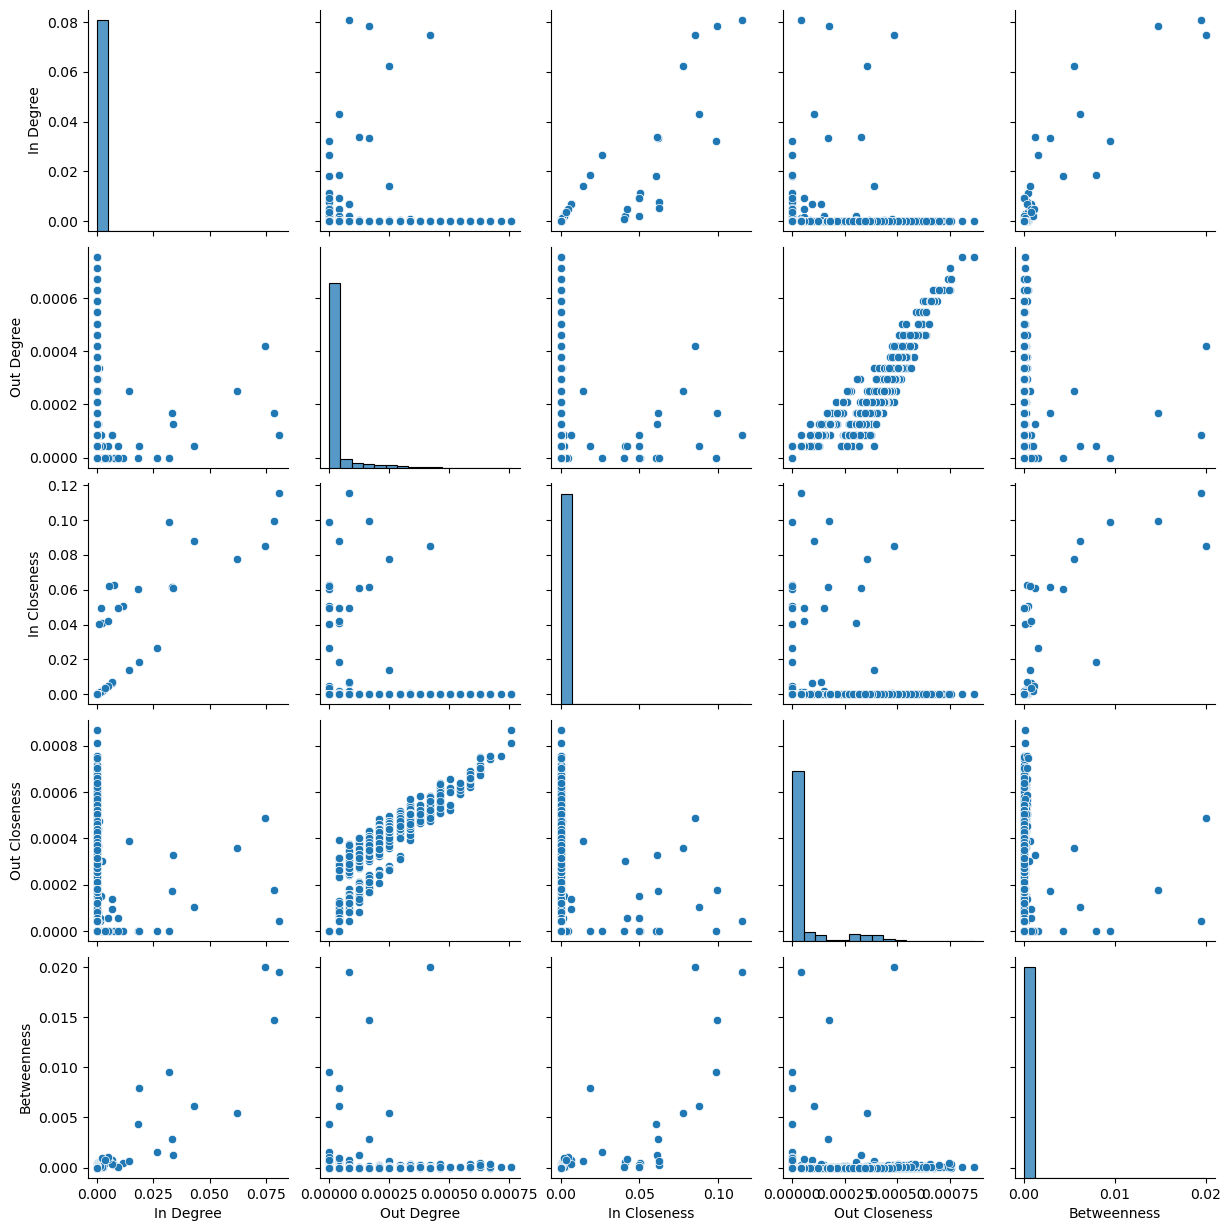

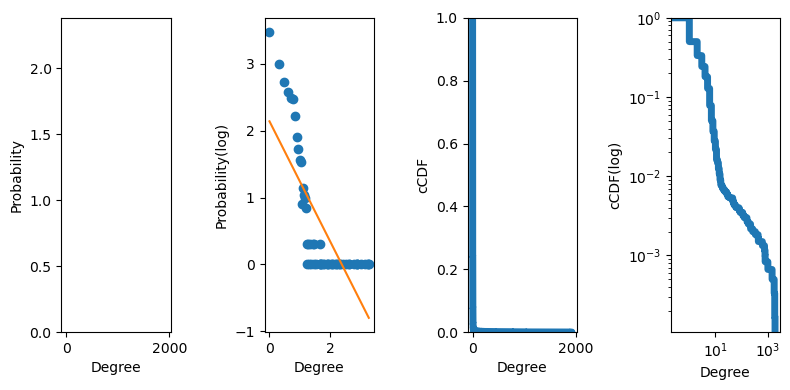

Average in-degree: 0.63
Average out-degree: 0.63


In [39]:
import nx_tools as nxt
# reload(nxt)

output_folder ="output"

nxt.plot_centrality_correlation(G,path=output_folder+"/test-1.pdf")
nxt.plot_degree_distribution(G,path=output_folder+"/test-2.pdf",fit=True)
nxt.ave_degree(G)
